In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# leer el dataset 
df0 = pd.read_csv('customer_shopping_data.csv')
df0.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [115]:
df0.shape

(99457, 10)

In [116]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [117]:
# valores unicos del atributo
print("Valores unicos: ", df0['gender'].unique())

Valores unicos:  ['Female' 'Male']


In [118]:
# numero de valores diferentes del atributo
print("Numero de valores unicos: ", df0['gender'].nunique())

Numero de valores unicos:  2


In [119]:
print("Numero de valores unicos: ", df0['payment_method'].nunique())

Numero de valores unicos:  3


In [120]:
print("Valores unicos: ", df0['payment_method'].unique())

Valores unicos:  ['Credit Card' 'Debit Card' 'Cash']


In [121]:
df1 = df0.copy()

In [122]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], dayfirst= True)

In [123]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [125]:
# agregar columna de meses y años en el dataframe
df1['month'] = pd.DatetimeIndex(df1['invoice_date']).month
df1['year'] = pd.DatetimeIndex(df1['invoice_date']).year

In [126]:
df1.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  month           99457 non-null  int32         
 11  year            99457 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 8.3+ MB


#### 1. Como es la relacion de género y número de transacciones

In [128]:
df2 = df1[['customer_id','gender','category']]

In [129]:
df2.head()

,customer_id,gender,category
0,C241288,Female,Clothing
1,C111565,Male,Shoes
2,C266599,Male,Clothing
3,C988172,Female,Shoes
4,C189076,Female,Books


In [130]:
# value_counts() mtodo que cuenta cantidad de elementos por categoria 
gender_quantity = df2['gender'].value_counts()
print(gender_quantity)

gender
Female    59482
Male      39975
Name: count, dtype: int64


[Text(0.5, 1.0, 'Gender Distribution')]

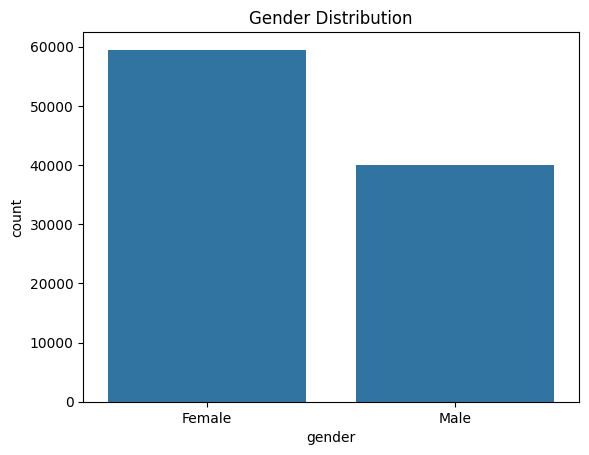

In [131]:
sns.countplot(data=df2, x='gender').set(title='Gender Distribution')

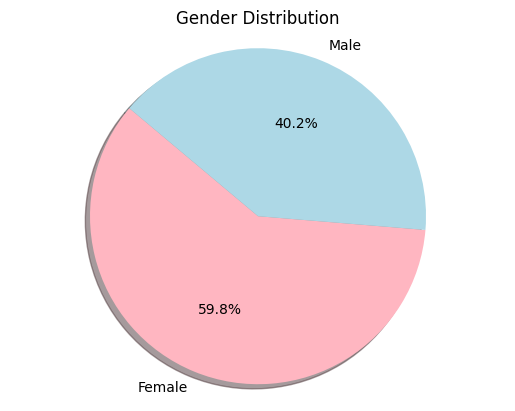

In [132]:
from collections import Counter

counter = Counter(df2['gender'])
labels = list(counter.keys())
sizes = list(counter.values())

colors = ['lightpink', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors[:len(labels)], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

### 2. Como es la distribución de edades por número de transacciones?

In [133]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021


In [134]:
df3 = df1.copy()

In [135]:
df3['age_category'] = df3['age']

In [136]:
df3.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,age_category
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022,28
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021,21
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021,20
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,66
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021,53


In [137]:
#Construir funcion para definir categorias de datos por edad

def category(age):
    if (age >= 18) and (age < 24):
        return "Gen Z"
    elif (age >= 25) and (age < 35):
        return "Millenials"
    elif (age >= 35) and (age < 50):
        return "Gen Y"
    elif (age >= 50) and (age < 65):
        return "Gen X"
    else:
        return "Boomers"

In [138]:
df3['age_category'] = df3['age_category'].apply(category)

In [139]:
df3.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,age_category
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022,Millenials
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021,Gen Z
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021,Gen Z
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,Boomers
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021,Gen X


In [140]:
age_cat_quantity = df3['age_category'].value_counts()
print(age_cat_quantity)

age_category
Gen Y         28906
Gen X         28547
Millenials    19081
Gen Z         11519
Boomers       11404
Name: count, dtype: int64


[Text(0.5, 1.0, 'Age Category')]

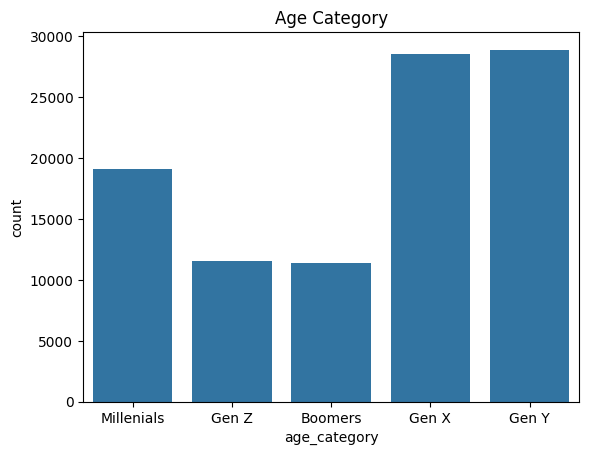

In [141]:
sns.countplot(data=df3, x='age_category').set(title='Age Category')

### 3. ¿Qué grupo de edad gastó más dinero?

In [142]:
df4 = df3.copy()

In [143]:
df4.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,age_category
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022,Millenials
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021,Gen Z
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021,Gen Z
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,Boomers
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021,Gen X


In [144]:
df4['total'] = df4['quantity'] * df4['price']

In [145]:
df4.head(20)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month,year,age_category,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8,2022,Millenials,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12,2021,Gen Z,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11,2021,Gen Z,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5,2021,Boomers,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10,2021,Gen X,242.40
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul,5,2022,Millenials,7502.00
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park,3,2022,Gen Y,40.66
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul,1,2021,Millenials,1200.32
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity,11,2021,Boomers,2700.72
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,2021-08-22,Kanyon,8,2021,Gen X,1200.32


In [146]:
df_spend = df4.groupby('age_category')['total'].sum()
df_spend

age_category
Boomers       29008986.33
Gen X         71961241.44
Gen Y         74358776.99
Gen Z         28371673.97
Millenials    47805115.52
Name: total, dtype: float64

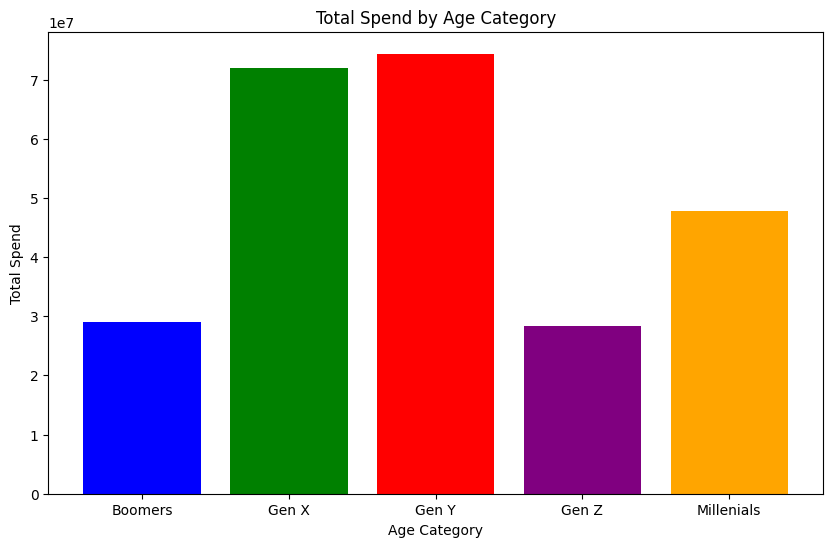

In [147]:
# Crear el gráfico de columnas
plt.figure(figsize=(10, 6))
plt.bar(df_spend.index, df_spend.values, color=['blue', 'green', 'red', 'purple', 'orange'])

# Añadir títulos y etiquetas
plt.title('Total Spend by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Spend')

# Mostrar el gráfico
plt.show()

### 4. Comprobar la distribución por edades entre hombres y mujeres

In [148]:
df5 = df4.copy()
df5[['gender', 'age_category']]

,gender,age_category
0,Female,Millenials
1,Male,Gen Z
2,Male,Gen Z
3,Female,Boomers
4,Female,Gen X
...,...,...
99452,Female,Gen Y
99453,Male,Millenials
99454,Male,Gen X
99455,Male,Gen X


In [149]:
df_dist = df5.groupby(['gender', 'age_category']).count()
df_dist

invoice_no  customer_id    age  category  quantity  \
gender age_category                                                       
Female Boomers             6790         6790   6790      6790      6790   
       Gen X              17080        17080  17080     17080     17080   
       Gen Y              17355        17355  17355     17355     17355   
       Gen Z               6783         6783   6783      6783      6783   
       Millenials         11474        11474  11474     11474     11474   
Male   Boomers             4614         4614   4614      4614      4614   
       Gen X              11467        11467  11467     11467     11467   
       Gen Y              11551        11551  11551     11551     11551   
       Gen Z               4736         4736   4736      4736      4736   
       Millenials          7607         7607   7607      7607      7607   

                     price  payment_method  invoice_date  shopping_mall  \
gender age_category                                                       
Female Boomers        6790            6790          6790           6790   
       Gen X         17080           17080         17080          17080   
       Gen Y         17355           17355         17355          17355   
       Gen Z          6783            6783          6783           6783   
       Millenials    11474           11474         11474          11474   
Male   Boomers        4614            4614          4614           4614   
       Gen X         11467           11467         11467          11467   
       Gen Y         11551           11551         11551          11551   
       Gen Z          4736            4736          4736           4736   
       Millenials     7607            7607          7607           7607   

                     month   year  total  
gender age_category                       
Female Boomers        6790   6790   6790  
       Gen X         17080  17080  17080  
       Gen Y         17355  17355  17355  
       Gen Z          6783   6783   6783  
       Millenials    11474  11474  11474  
Male   Boomers        4614   4614   4614  
       Gen X         11467  11467  11467  
       Gen Y         11551  11551  11551  
       Gen Z          4736   4736   4736  
       Millenials     7607   7607   7607

In [157]:
# Desapilar el DataFrame para tener una mejor estructura para graficar
df_dist = df_dist.unstack(level=0)
df_dist_chart = df_dist[['total']]
df_dist_chart

total
gender age_category       
Female Boomers        6790
       Gen X         17080
       Gen Y         17355
       Gen Z          6783
       Millenials    11474
Male   Boomers        4614
       Gen X         11467
       Gen Y         11551
       Gen Z          4736
       Millenials     7607

In [158]:
df_dist_chart_female = df_dist_chart.loc['Female']
df_dist_chart_female

,total
age_category,
Boomers,6790
Gen X,17080
Gen Y,17355
Gen Z,6783
Millenials,11474


In [159]:
df_dist_chart_male = df_dist_chart.loc['Male']
df_dist_chart_male

,total
age_category,
Boomers,4614
Gen X,11467
Gen Y,11551
Gen Z,4736
Millenials,7607


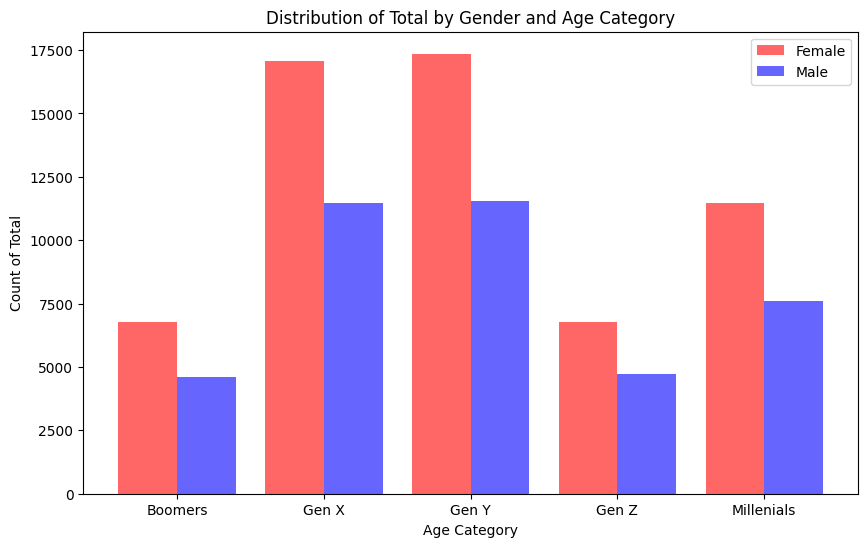

In [160]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Definir posiciones de las barras
pos = list(range(len(df_dist_chart_female)))
bar_width = 0.4

# Plotear barras
plt.bar(pos, df_dist_chart_female['total'], width=bar_width, label='Female', color='red', alpha=0.6)

# Se ajustan las posiciones en el eje x para las barras de Male para que no se 
# solapen con las de Female. Las barras de Male se desplazan a la derecha 
# sumando bar_width a cada posición original.
plt.bar([p + bar_width for p in pos], df_dist_chart_male['total'], width=bar_width, label='Male', color='blue', alpha=0.6)

# Añadir etiquetas de ejes y título
plt.title('Distribution of Total by Gender and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count of Total')

# Añadir etiquetas de categorías en el eje x
ax.set_xticks([p + bar_width / 2 for p in pos])
ax.set_xticklabels(df_dist_chart_female.index)

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.show()